In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv('/content/google.csv')
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])  ## covert the date object into datetime of panda

In [5]:
df.set_index('Date',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4471 entries, 2004-08-19 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4471 non-null   float64
 1   High       4471 non-null   float64
 2   Low        4471 non-null   float64
 3   Close      4471 non-null   float64
 4   Adj Close  4471 non-null   float64
 5   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 244.5 KB


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


Date – The trading date (from 2004-08-19 onward).

Open – The price of the stock when the market opened on that date.

High – The highest price of the stock reached that day.

Low – The lowest price of the stock reached that day.

Close – The price of the stock when the market closed that day.

Adj Close – The closing price adjusted for stock splits and dividends (better for long-term analysis).

Volume – The total number of shares traded that day.

In [8]:
df['year']=df.index.year
df['week']=df.index.weekday
df['month_name']=df.index.month_name()
df['quarter']=df.index.quarter

In [9]:
yearly_analysis=df.groupby('year').agg(
    max_open = ('Open', 'max'),
    max_close = ('Close', 'max'),
    avg_close = ('Close', 'mean'),
    total_volume = ('Volume', 'sum')
).reset_index()


yearly_analysis.set_index('year')

,max_open,max_close,avg_close,total_volume
year,,,,
2004,99.243011,98.431053,75.617206,1712853822
2005,215.965515,215.213333,138.360933,5407532667
2006,254.530960,253.873413,204.824916,4279235331
2007,369.181213,369.509979,268.369305,2740617749
2008,345.141327,341.385406,231.558071,3210724446
2009,311.208527,310.272034,219.023214,1775245013
2010,313.823700,312.214752,266.811472,1608679415
2011,320.174896,321.744019,283.424738,1557237910
2012,383.915985,382.590942,320.208021,1307068318


In [10]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume,year,week,month_name,quarter
Date,,,,,,,,,,
2004-08-19,49.81329,51.835709,47.800831,49.982655,49.982655,44871361,2004,3,August,3


<Axes: xlabel='Date'>

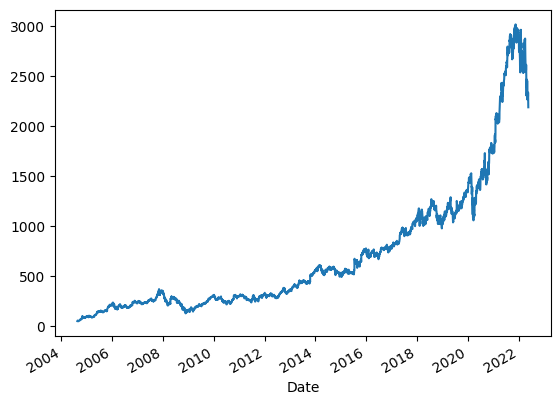

In [13]:

df['Close'].plot()

<Axes: xlabel='Date'>

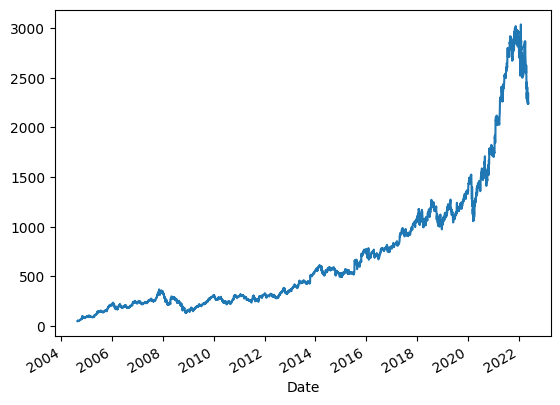

In [14]:
df['Open'].plot()

<Axes: xlabel='Date'>

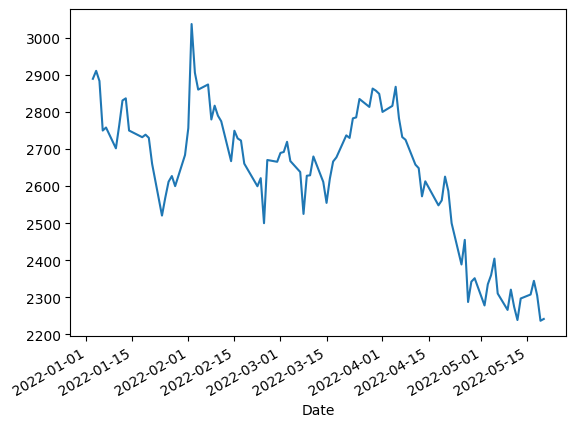

In [19]:
df.loc['2022']['Open'].plot()

<Axes: xlabel='Date'>

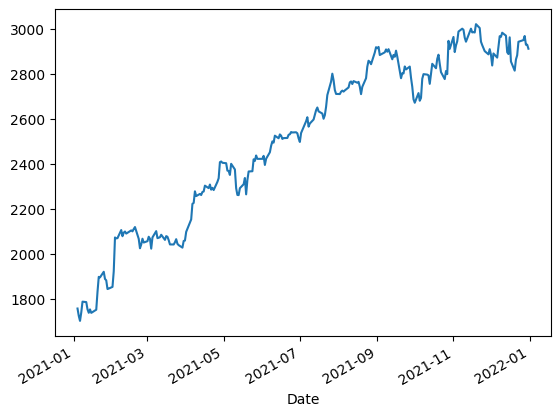

In [20]:
df.loc['2021']['Open'].plot()

<Axes: xlabel='Date'>

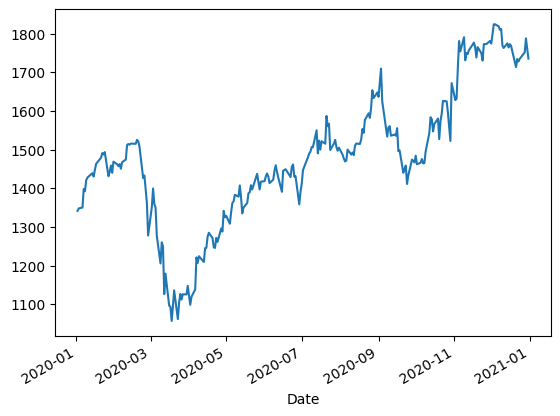

In [21]:
df.loc['2020']['Open'].plot()

In [11]:
df['Date'] = pd.to_datetime(df.index)

# Group by year and extract first/last Close
yearly_closes = df.groupby(df.index.year).agg(
    First_Close=('Close', 'first'),
    Last_Close=('Close', 'last')
).reset_index()
yearly_closes['Yearly_Return (%)'] = (
    (yearly_closes['Last_Close'] - yearly_closes['First_Close'])
    / yearly_closes['First_Close'] * 100
)

In [12]:
yearly_closes

,Date,First_Close,Last_Close,Yearly_Return (%)
0,2004,49.982655,96.035034,92.136720
1,2005,100.976517,206.655411,104.656902
2,2006,216.802368,229.380234,5.801535
3,2007,232.921951,344.448914,47.881688
4,2008,341.315674,153.250580,-55.100046
5,2009,160.060059,308.832428,92.947841
6,2010,312.204773,295.875977,-5.230156
7,2011,301.046600,321.744019,6.875155
8,2012,331.462585,352.369232,6.307393
9,2013,360.274597,558.262512,54.954725


2005 → +104.7% return (stock more than doubled).
Worst Year 2008 → -55.1% return (global financial crisis).

<Axes: xlabel='year'>

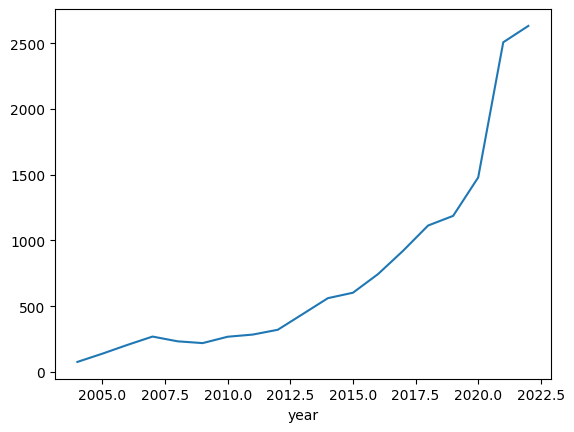

In [26]:
df.groupby('year')['Open'].mean().plot()  ## share opening yearly trend

<Axes: xlabel='month_name'>

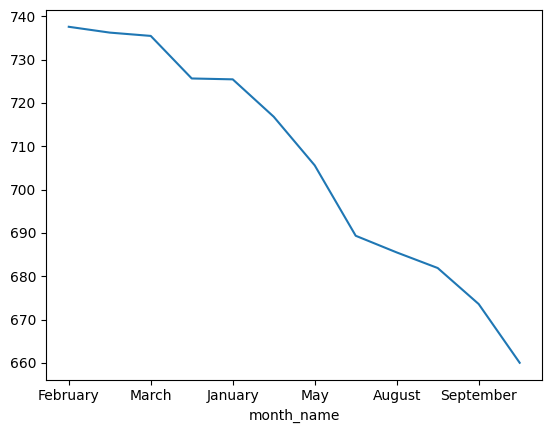

In [33]:
df.groupby('month_name')['Open'].mean().sort_values(ascending=False).plot()  # monthly trend of openming price

<Axes: xlabel='quarter'>

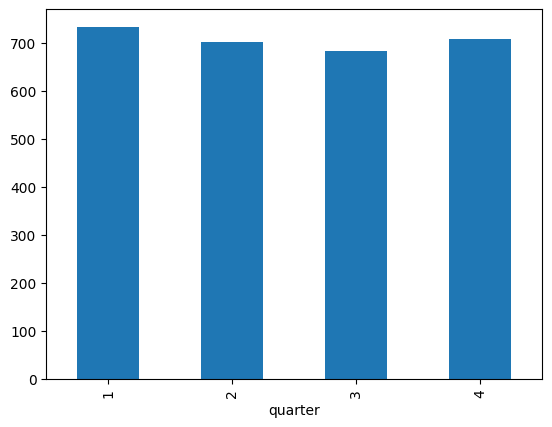

In [37]:
df.groupby('quarter')['Open'].mean().plot(kind='bar')